# PROJECT DESCRIPTION
The fitness network «Bodybilder» is working out a customer engagement strategy based on a client'sanalysis.The most common issue is customer churn. To tackle the problem, a customer service department of «Bodybilder» has transferred  a handful of clients' questionnaire to e-format. The main goal is to carry out analysis and prepare a plan on how to retain customers.
We have data on clients for the month before the customer churn was checked:
 - 'gender'
 - 'Near_Location' — a place of residence or  a workplace in the environs of «Bodybilder»
 - 'Partner' — the employee of the partner company (a partnership with companies, whose employees can get discounts on subscriptions;«Bodybilder» has an data on clinets' employers);
 - 'Promo_friends' — the fact of an initial mark within the campaigh "bring a friend"(the client used promo_code received from a   friend for the first subscription);
 - 'Phone' 
 - 'Age'
 - 'Lifetime' —the period since the first visit to «Bodybilder» (months)

Data from visitor logs,purchases and a client's subscription status:
- 'Contract_period' — the lenght of a current subscription (month, 6 month, year);
- 'Month_to_end_contract' — the perios till the end of a current subscription(months);
- 'Group_visits' — the fact of visiting groups' classes
- 'Avg_class_frequency_total' — an average frequency of visits per week since the start of a subscription
- 'Avg_class_frequency_current_month' — an average frequency of visits per week for a previous month
- 'Avg_additional_charges_total' — total sales from incremental services: cafes, sport goods, massage parlor and beauty salon.

## Data preparation

### Unloading data 

In [14]:
# download all libraries, required for future analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

In [15]:
df = pd.read_csv('/datasets/gym_churn.csv')# import csv file with c client's data per month+his current status
# subscription+visits and purchases log
print(df.shape) # the size of dataframe
print()

# check the formats and gaps,discreteness/continuity
def unique_values(df):
    values = pd.DataFrame()
    for col in df.columns:
        values[col] = [df[col].unique(),df[col].nunique(),df[col].isna().sum(),
                       round(df[col].isna().sum()*100/len(df),2),df[col].dtype.name]
                      
    return values.transpose().sort_values(by=1).rename({0:'Values',1:'Number of unique values',
                                                        2:'Q-ty NaN', 3:'% Nan',4:'Type'},axis=1)
display(unique_values(df))

# conversion of the column names to lower case
df.columns = df.columns.str.lower()

display(df.head(10))# select top 10 rows


(4000, 14)



,Values,Number of unique values,Q-ty NaN,% Nan,Type
gender,"[1, 0]",2,0,0.0,int64
Near_Location,"[1, 0]",2,0,0.0,int64
Partner,"[1, 0]",2,0,0.0,int64
Promo_friends,"[1, 0]",2,0,0.0,int64
Phone,"[0, 1]",2,0,0.0,int64
Group_visits,"[1, 0]",2,0,0.0,int64
Churn,"[0, 1]",2,0,0.0,int64
Contract_period,"[6, 12, 1]",3,0,0.0,int64
Month_to_end_contract,"[5.0, 12.0, 1.0, 6.0, 3.0, 10.0, 11.0, 9.0, 4....",12,0,0.0,float64
Age,"[29, 31, 28, 33, 26, 34, 32, 30, 23, 27, 35, 2...",23,0,0.0,int64


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


#### Conclusion
     - The dataset contains 4000 rows and 14 columns (13 attributes and "churn"- the fact of customer churn)
     - There are no gaps in data
     - The attributes comprise 5 continuous and 8 discrete ones


### EDA

In [16]:
# examine average values and bias
df.drop('churn',axis=1).describe()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [17]:
# average values for both groups — those who left and who stayed
groups = df.groupby('churn').mean()
display(groups)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


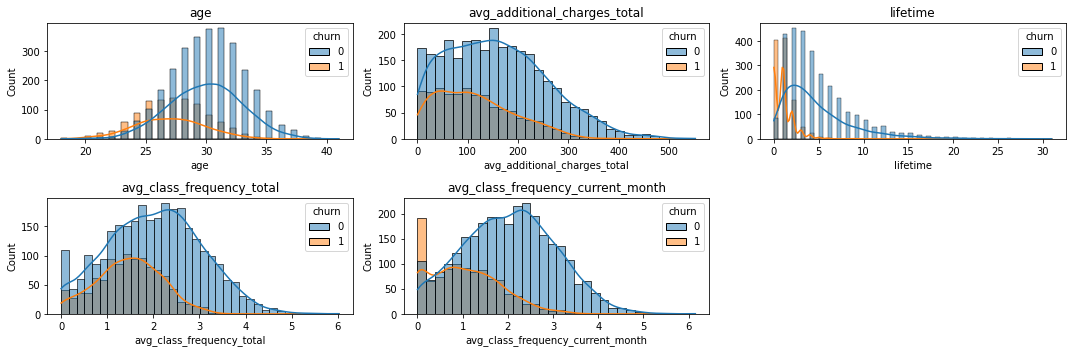

In [18]:
# creations of histograms for attributes of both left and stayed customers
 # identifying continuous attributes
continuous = ['age','avg_additional_charges_total','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

col_count, row_count =3,3 #the q-ty of columns and rows in the graph
plt.figure(figsize=(15, 7))

for i, feature in enumerate(continuous):
        sns.histplot(df,x=df[feature],hue='churn',kde=True,
                   ax=plt.subplot(row_count,col_count,i+1))
        plt.title(feature)
plt.tight_layout()

    

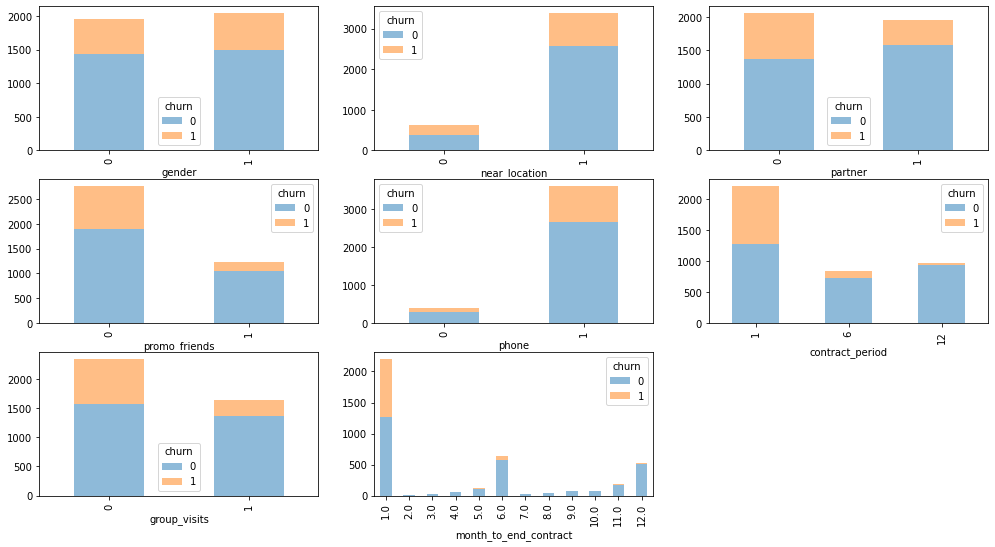

In [19]:
# create bar charts for discrete attributes
discrete = ['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','month_to_end_contract']

plt.figure(figsize=(17, 9))

i=0
for parametr in discrete:
    parametres = df.pivot_table(index=parametr, columns='churn', values='lifetime',aggfunc='count')
    parametres.plot(kind='bar',stacked=True,alpha=0.5, ax=plt.subplot(3,3,i+1))
    i+=1


<AxesSubplot:>

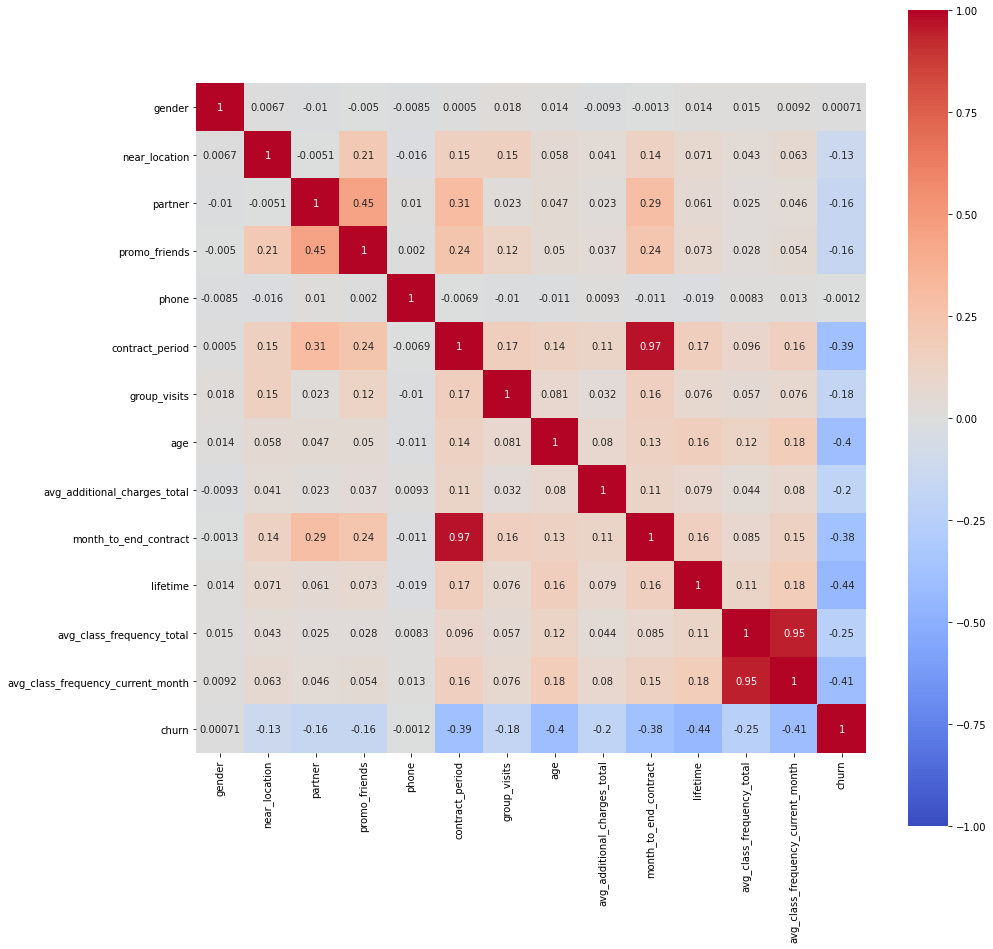

In [20]:
# creation of a matrix of correlation beetween attribites
cm = df.corr() 
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True, square=True,vmin=-1,vmax=1, cmap='coolwarm')


#### Conclusion

- No influence on churn rate: gender, left phone

- Attributes with influence on churn rate:

- among discreet attributes:
- the contract_period is inversely proportional to the possibility of customer churn (1 month- 50/50, 6 months- 25/75,     12 months-10/90)
- month_to_end_contract (1 month to the end of contract the possibility of customer churn is 40%,
  besides, 6 months is also a significant point,but the possibility is less or equal 10%)
- group_visits decreases the possibility of customer churn
- an initial visit through an offer "bring friend" reduce the possibility as well
- near_location (the closer a client lives the lower the possibility of customer churn) 
- a partner discount reduces the possibility also

- among continuous attributes:
- the most typical age for leaving clients - 27, for staying-31
- left clients have had a lower additional sales
- the period since the first visit to "Bodybuilder" (clients leave "Bodybuilder" during the first 5 months after the first       visit. The longer period- the less customer churn)
- avg_class_frequency of left clients-1,5, of stayed-2,3. Last month before the churn avg_class_frequencyis close to null.
    

### Model for customer churn forecasting

In [21]:
# binary classification model
# target feature-the fact of customer churn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier # 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# the division of the data on features (matrix X) и target variable (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# the division of the data on training and validation samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify = y)

# create an object with class StandardScaler and apply to the training sample
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train)

# apply a standardization to the indicators matrix of the validation sample
X_test_st = scaler.transform(X_test)

# the list of models
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators = 100,random_state=0),
]

# input a model and samples into the finctions to calculate quality metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        '\tAccuracy: {:.2f} \tPrecision: {:.2f} \tRecall: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)) 
        )
   
# the cycle for the each model from the list "models" to calculate quality metrics
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)



LogisticRegression(random_state=0)
	Accuracy: 0.94 	Precision: 0.90 	Recall: 0.85
RandomForestClassifier(random_state=0)
	Accuracy: 0.92 	Precision: 0.88 	Recall: 0.83


#### Conclusions
- The share of right results is almost equal for both models. Precision and recall are higher in case of                         LogisticRegression

### Clients' clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage 
scaler = StandardScaler() 
x_sc = scaler.fit_transform(df.drop(columns = ['churn'])) 


linked = linkage(x_sc, method = 'ward') 

# clusters' visualisation
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()
# We make an assumption of 4 clusters based on the dendrogramma

In [ ]:
# the forecast of a clusterisation model based on k-means algorithm
from sklearn.cluster import KMeans
import itertools 

# introduce the function of pair features visualisaton for clusters
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# k-means model with 4 clusters
km = KMeans(n_clusters=4, random_state=0)

# the forecast of clusters (the algorithm assigns marks from 0 to 4 to clusters)
labels = km.fit_predict(x_sc)

# save clusters' marks in our dataset
df['cluster_km'] = labels


# shoe average values of features for each cluster
new= df.groupby('cluster_km').mean().reset_index()


# the graphs with pair features with a breakdown of clusters
col_pairs = list(itertools.combinations(new.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(new, pair[0], pair[1], 'cluster_km')
    

In [ ]:
#  continuous feautures distibution with a breakdown of clusters

continuous = ['age','avg_additional_charges_total','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

col_count, row_count = 3,3 #число рядов и столбцов в сетке графиков
plt.figure(figsize=(15, 10))

for i, feature in enumerate(continuous):
        
        sns.histplot(df,x=df[feature],hue='cluster_km',kde=True,
                   ax=plt.subplot(row_count,col_count,i+1),palette='hls')
        plt.title(feature)
plt.tight_layout()



In [ ]:
# the share of customer churn for each cluster
cluster_lost = df.groupby('cluster_km').agg({'churn':'mean'}).rename(columns={'churn':'lost'})
cluster_lost['% lost'] = round(cluster_lost['lost']*100,2)
cluster_lost['% lost'] = cluster_lost['% lost'].astype(str) + '%'
print(cluster_lost)

#### Conclusions
 - We have split clients' database on 4 clusters based on the dendrogram
 
    
 - The highest customer churn is in the 1st cluster:
    - the biggest one
    - the prevaling share of women
    - clients leaving far from "Bodybuilder"
    - the share of clients_partners is small
    - small periods of subscriptions
    - clients with seldom group_visits
    - the most common age among the clients is the the age prone to churn
    - the lowest quantity of the clients started with "bring a friend"
    - the clients with insignificant additional costs
    - little time since the first visit
    - the frequency of classes is low
    - little time_to_end_of_contract left
    
    
  - The second one in customer churn is cluster 0 with 27% 
    - the 2d in size
    - the share of women is much less than in 1st cluster and less than in 3d cluster
    - clients leaving not so far from "Bodybuilder" as the 1st cluster, almost on the 2d level, but far lower than the 3d one
    - the share of clients_partners is bigger than in 1st cluster, but smaller than in 3d one
    - small periods of subscriptions, but bigger than in 1st cluster and lower than in 3d one
    - the q-ty of group_visits is bigger than in 1st cluster and smaller than in 3d one
    - the most common age among the clients is closer to churn age but not so close as in 1st cluster and not so close to             loyalty age as in 3d one
    - the bigger quantity of the clients started with "bring a friend" than in 1st cluster but smaller than in 3d one
    - additional costs are bigger than in 1st cluster but smaller than in 3d one
    - lifetime is bigger than in 1st one and smaller than in 3d one
    - the frequency of classes is bigger than in 1st one and smaller than in 3d one
    - time_to_end_of_contract is more than in 1st cluster but smaller than in 3d one
    

 - The lowest customer churn is in the 3d cluster:
   - the smallest one
   - the highest rates of all features favoured to loyalty
   - except for: age mix,gender and average_class_frequency. These features are the highest in the 2d cluster
   
   
 - The 2d cluster is almost on the same level as the 3d one; a loyal one. 
 
 - why the 2d could be the most loyal like 3d one:
  
   - the prevailing share of men
   - group_visits is almost as frequent as in 3d cluster
   - an average age is closer to loyal age than 3d one
   - additional charges is almost as huge as in 3d one
   - the highest average_class_frequency
   - lifetime is almost as long as in 3d one
   
 - why the 2d could be the weakest:
   - the share of clients_partners is the smallest one
   - the quantity of the clients started with "bring a friend" is almost as small as in 1st cluster
   - subscription period is almost as small as in 1st cluster
   - month_to_end_contract is close to the period in 1st cluster, the weakest one
   

### Recommendations for work with clients

 Recommendations for cluster 1-the cluster with the highest possibility of customer churn
 
   - actions targeted at favoured feautures to retain customers:
    - group_visits (clients' engagement in group_trainings)
    - avg_class_frequency_total (the system of cumulative points for days of visits, that could be spent on goods)
    - increase in loyal age
    - additional charges (the system of cumulative points for days of visits, that could be spent on goods)
    - the share of men
    - contract_period (more beneficial terms for long-term contracts)
    - time since the first visit (special discounts on additional services since the 2st month of membership increasing               gradually)
    - time_to_end_of_contract left (mailing with special offers for this segment)
    
    
  - the main goal-to encourage the clients to overstep 1 month treshhold
    - offering more beneficial long-term contracts in comparison with 1 month contract; a system of cumulative points,               that could be spent on goods and services of "Bodybuilder"
    - forging ties between club members based on clients' interets search: an increase in group_visits, private events, signs         of belonging
    
    
  - the model used for forecasting
    - Logistic regression model shows the best results (high precision of 90% enables to identify the q-ty of prospective           customer churn. Marketing campaigns on retention cost a lot, high precision prevent business from waste of money.
      Recall indicator of 85% is higher than in the model of random forest. A high recall indicator enables not to loose             clients,that are going to leave. 
  
Recommendations for cluster 0- the second cluster after cluster 1 with 27% customer churn 
   -  as this cluster displays just a little better results on all the features in comparison with 1st cluster
   -  we should apply the same recommendations as in cluster 1
     
Recommendations for cluster 2- the much more loyal than 1 and 2 and just a little worse than the strongest 3d one:  
  - actions targeted at the feautures "why the 2d could be the weakest" from 1.4.1 Conclusions
   - increase in a contract_period
   - target at clients with few months till the end of the contract in order to retain
